In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score,roc_curve,auc
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Employee_Data.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.isna().any().any()

False

In [5]:
# encoding categorical values
#Columns with string values 
categorical_column = ['Attrition', 'BusinessTravel', 'Department','Gender', 'JobRole', 'MaritalStatus', 'OverTime','EducationField']
encoder=LabelEncoder()
df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)

In [6]:
# separate features and labels and drop the unwanted features
y=df['Attrition']
X=df.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)

In [7]:
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32


In [8]:
print(X)

      Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0      41               2       1102           2                 1          2   
1      49               1        279           1                 8          1   
2      37               2       1373           1                 2          2   
3      33               1       1392           1                 3          4   
4      27               2        591           1                 2          1   
...   ...             ...        ...         ...               ...        ...   
1465   36               1        884           1                23          2   
1466   39               2        613           1                 6          1   
1467   27               2        155           1                 4          3   
1468   49               1       1023           2                 2          3   
1469   34               2        628           1                 8          3   

      EducationField  Envir

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

## PCA

In [10]:
pca = PCA(random_state=0)
principalComponents = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)


[7.00440546e-01 2.97307536e-01 2.24298124e-03 5.58714588e-06
 1.02432129e-06 8.65812272e-07 6.28760277e-07 1.84241811e-07
 1.65136660e-07 8.22457220e-08 8.07817986e-08 7.04961164e-08
 5.35184574e-08 4.20803612e-08 2.46622781e-08 2.15832140e-08
 1.63087766e-08 1.55645750e-08 1.53081179e-08 1.34489227e-08
 1.29830632e-08 7.02656374e-09 6.40486522e-09 6.07342385e-09
 3.30135270e-09 2.71536728e-09 2.45991841e-09 2.14531109e-09
 1.27227768e-09 7.09631412e-10]


In [11]:
pca = PCA(n_components=2, random_state=0)
principalComponents = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)


[0.70044055 0.29730754]


In [12]:
X_train = principalComponents
X_test = pca.transform(X_test)

In [13]:
print(X_train)

[[10292.99476036 -5152.98584746]
 [12336.24110604  3009.52798686]
 [ 5642.83846936 13001.11656338]
 ...
 [ 3603.48302731  9719.53725868]
 [-6037.33274636  9987.83680427]
 [-7608.79598874 -3969.6793369 ]]


In [14]:
print(X_test)

[[-9.56901947e+03 -1.65438681e+03]
 [ 3.65307550e+03 -5.18484288e+03]
 [-3.17418746e+03 -4.16597377e+03]
 [ 3.68425230e+03 -4.53425345e+03]
 [ 4.25264453e+03  6.63474048e+03]
 [ 9.52230114e+03 -2.76133095e+03]
 [-8.35187530e+03  1.11479659e+04]
 [ 8.52934033e+03 -4.35294414e+03]
 [ 1.11665522e+03  3.41377392e+03]
 [-9.47099318e+03 -1.76901429e+03]
 [ 9.77274172e+03  1.06535947e+04]
 [ 1.06365757e+04  6.41794204e+03]
 [-6.37822434e+03 -3.78196625e+03]
 [ 6.81107657e+03 -4.25462709e+03]
 [-8.37602269e+03 -3.37042085e+03]
 [ 1.22625918e+04  3.13954686e+03]
 [-8.65040352e+03 -3.08758482e+03]
 [ 8.10956209e+03 -4.30706143e+03]
 [-1.09566875e+04 -1.86863318e+03]
 [-4.39193332e+03  1.05852431e+03]
 [-2.24331027e+02 -1.16626442e+03]
 [-9.06096163e+03 -2.97212602e+03]
 [ 1.81673742e+03 -1.14062575e+03]
 [-5.89142744e+03  3.78441870e+03]
 [-1.96910002e+03 -1.36842151e+02]
 [ 5.77697514e+03 -1.67697237e+03]
 [ 1.24514316e+04 -1.58663945e+03]
 [-5.03194099e+03 -4.16031387e+03]
 [ 5.55671431e+03 -4

In [15]:
#Apply random forest
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred))
  print("Recall: ",recall_score(y_test,y_pred))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
# Setting random state for randomization
rf = RandomForestClassifier(random_state=42)
train_predict_evaluate (rf, X_train, y_train, X_test)

Accuracy:  0.8117913832199547
Precision:  0.35
Recall:  0.09090909090909091
Confusion Matrix:
 [[351  13]
 [ 70   7]]


In [17]:

  scores = cross_validate(rf, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))

  print("Accuracy: ", np.mean(scores['test_accuracy']))
  print("Precision: ", np.mean(scores['test_precision']))
  print("Recall: ", np.mean(scores['test_recall']))
  print("F1 Score: ", np.mean(scores['test_f1']))


Accuracy:  0.8571428571428571
Precision:  0.7703030303030303
Recall:  0.1646276595744681
F1 Score:  0.2691327643740822


In [18]:
from sklearn.svm import SVC

In [19]:
df = pd.read_csv('Employee_Data.csv')

In [20]:
categorical_column = ['Attrition', 'BusinessTravel', 'Department','Gender', 'JobRole', 'MaritalStatus', 'OverTime','EducationField']
encoder=LabelEncoder()
df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)

In [21]:
y=df['Attrition']
X=df.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)

##SVC implementation

In [22]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
pca = PCA(n_components=2, random_state=0)
X_train_pca = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)


[0.1569156  0.06296227]


##  Scaling added


In [24]:
standard_scaler = StandardScaler()

pca_std = PCA(n_components=20, random_state=0)
X_train_standardized = pca_std.fit_transform(standard_scaler.fit_transform(X_train))
print(pca_std.explained_variance_ratio_)
X_test_standardized = pca_std.transform(standard_scaler.transform(X_test))
X_standardized = pca_std.transform(standard_scaler.fit_transform(X))

[0.1569156  0.06296358 0.06029072 0.05737142 0.05209841 0.04081862
 0.03858818 0.03776062 0.03689658 0.03674428 0.0352883  0.03314648
 0.03264592 0.03191814 0.03116435 0.03069023 0.03005154 0.02895685
 0.02771867 0.02696413]


In [25]:
min_max_scaler = MinMaxScaler()

pca_norm = PCA(n_components=17, random_state=0)
X_train_normalized = pca_norm.fit_transform(min_max_scaler.fit_transform(X_train))
print(pca_norm.explained_variance_ratio_)
X_test_normalized = pca_norm.transform(min_max_scaler.transform(X_test))

X_normalized = pca_norm.transform(min_max_scaler.fit_transform(X))

[0.09838031 0.0892584  0.07801632 0.07010343 0.06825531 0.05523048
 0.04989256 0.04944658 0.0475861  0.04214314 0.03661891 0.03353339
 0.03297366 0.03146538 0.03002955 0.02578105 0.0242777 ]


In [26]:
X_train = X_train_pca
X_test = pca.transform(X_test)
X = pca.transform(X)

C:\Users\Haji\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [27]:
metrics_para =[]
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  metrics_val =[]
  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred))
  print("Recall: ",recall_score(y_test,y_pred))
  print("F1 Score: ",f1_score(y_test,y_pred))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
  metrics_val.append(accuracy_score(y_test,y_pred))
  metrics_val.append(precision_score(y_test,y_pred))
  metrics_val.append(recall_score(y_test,y_pred))
  metrics_val.append(f1_score(y_test,y_pred))
  
  fpr,tpr,thresholds = roc_curve(y_test,y_pred)
  plt.plot(fpr, tpr,color='green',label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
  plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend(loc="lower right")
  plt.show()
  return metrics_val

Accuracy:  0.8594104308390023
Precision:  0.0
Recall:  0.0
F1 Score:  0.0
Confusion Matrix:
 [[379   1]
 [ 61   0]]


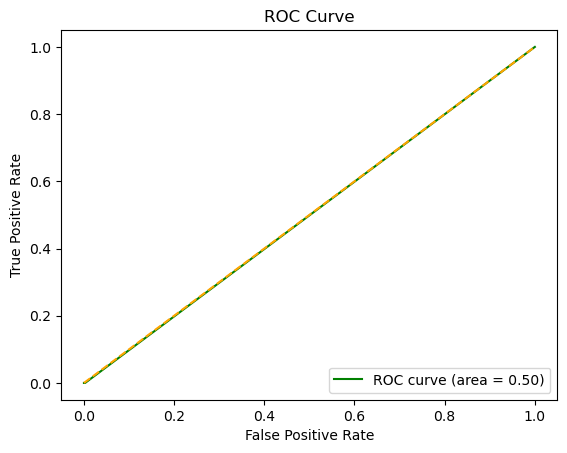

In [28]:
metrics_para.append(train_predict_evaluate(SVC(random_state=0),X_train,y_train,X_test)) # without scaling

Accuracy:  0.873015873015873
Precision:  0.8571428571428571
Recall:  0.09836065573770492
F1 Score:  0.17647058823529413
Confusion Matrix:
 [[379   1]
 [ 55   6]]


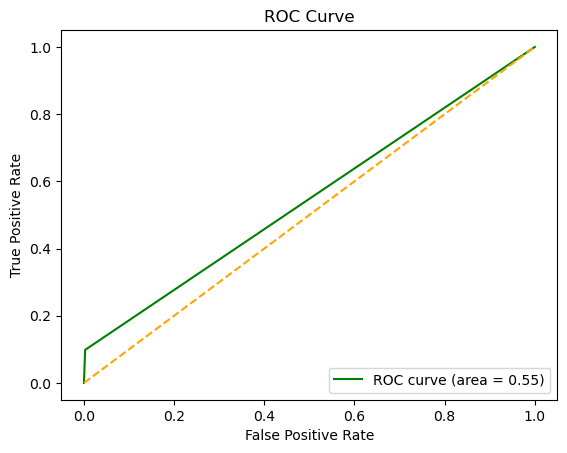

In [29]:
metrics_para.append(train_predict_evaluate(SVC(random_state=0),X_train_standardized,y_train,X_test_standardized))

Accuracy:  0.8707482993197279
Precision:  0.75
Recall:  0.09836065573770492
F1 Score:  0.17391304347826086
Confusion Matrix:
 [[378   2]
 [ 55   6]]


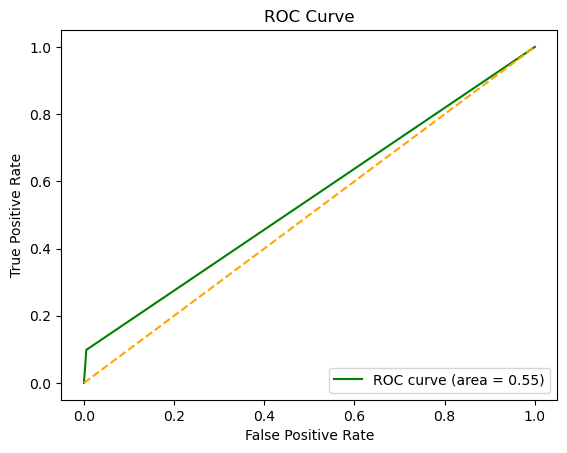

In [30]:
metrics_para.append(train_predict_evaluate(SVC(random_state=0),X_train_normalized,y_train,X_test_normalized))

In [31]:
metrics_val_df = pd.DataFrame(metrics_para,columns=["Accuracy","Precision","Recall","F1 Score"],index=["Without Scaling","With Standardization","With Normalization"])
metrics_val_df.head()

,Accuracy,Precision,Recall,F1 Score
Without Scaling,0.859410,0.000000,0.000000,0.000000
With Standardization,0.873016,0.857143,0.098361,0.176471
With Normalization,0.870748,0.750000,0.098361,0.173913


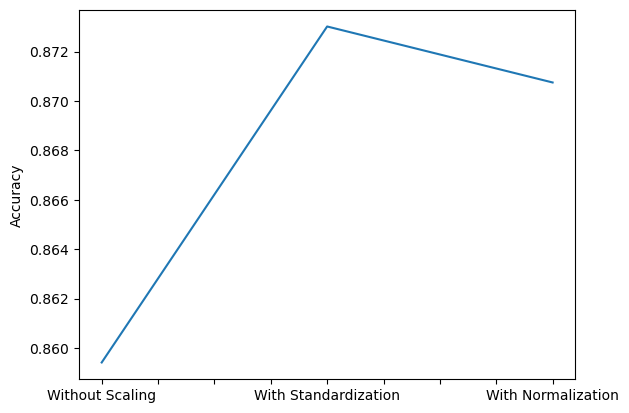

In [32]:
#plot the metrics
metrics_val_df['Accuracy'].plot()
plt.ylabel("Accuracy")
plt.show()


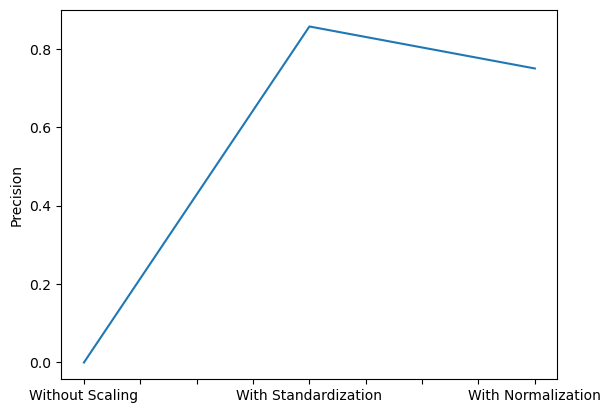

In [33]:
metrics_val_df['Precision'].plot()
plt.ylabel("Precision")
plt.show()

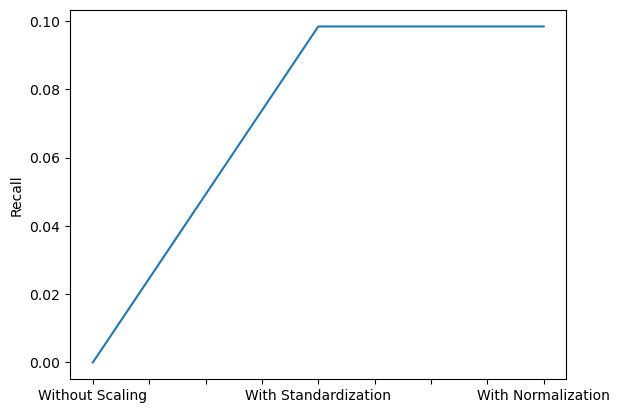

In [34]:
metrics_val_df['Recall'].plot()
plt.ylabel("Recall")
plt.show()

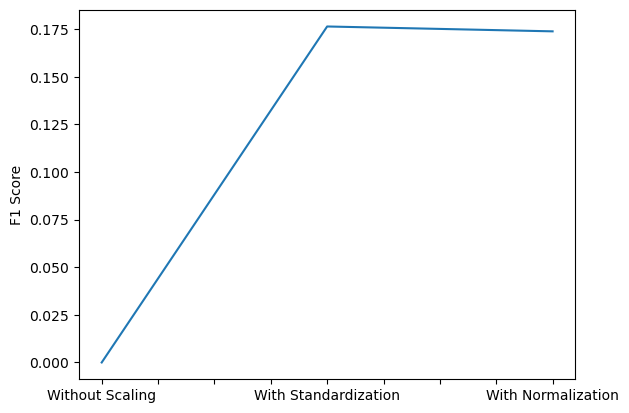

In [35]:
metrics_val_df['F1 Score'].plot()
plt.ylabel("F1 Score")
plt.show()

## MLP 

In [36]:
from sklearn.neural_network import MLPClassifier

In [37]:
df = pd.read_csv('Employee_Data.csv')
categorical_column = ['Attrition', 'BusinessTravel', 'Department','Gender', 'JobRole', 'MaritalStatus', 'OverTime','EducationField']
encoder=LabelEncoder()
df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)

In [38]:
y=df['Attrition']
X=df.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)

In [39]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
pca = PCA(n_components=2, random_state=0)
X_train_pca = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)

[0.1569156  0.06296227]


In [41]:
standard_scaler = StandardScaler()

pca_std = PCA(n_components=20, random_state=0)
X_train_standardized = pca_std.fit_transform(standard_scaler.fit_transform(X_train))
print(pca_std.explained_variance_ratio_)
X_test_standardized = pca_std.transform(standard_scaler.transform(X_test))
X_standardized = pca_std.transform(standard_scaler.fit_transform(X))

[0.1569156  0.06296358 0.06029072 0.05737142 0.05209841 0.04081862
 0.03858818 0.03776062 0.03689658 0.03674428 0.0352883  0.03314648
 0.03264592 0.03191814 0.03116435 0.03069023 0.03005154 0.02895685
 0.02771867 0.02696413]


In [42]:
min_max_scaler = MinMaxScaler()

pca_norm = PCA(n_components=17, random_state=0)
X_train_normalized = pca_norm.fit_transform(min_max_scaler.fit_transform(X_train))
print(pca_norm.explained_variance_ratio_)
X_test_normalized = pca_norm.transform(min_max_scaler.transform(X_test))

X_normalized = pca_norm.transform(min_max_scaler.fit_transform(X))

[0.09838031 0.0892584  0.07801632 0.07010343 0.06825531 0.05523048
 0.04989256 0.04944658 0.0475861  0.04214314 0.03661891 0.03353339
 0.03297366 0.03146538 0.03002955 0.02578105 0.0242777 ]


In [43]:
X_train = X_train_pca
X_test = pca.transform(X_test)
X = pca.transform(X)

C:\Users\Haji\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [44]:
def tune_hyperparameters(model,X,y):
  param_grid = {
      'activation' : ['identity','logistic','tanh','relu'],
      'solver': ['lbfgs','sgd','adam'],
      'alpha': [0.0001,0.05]
  }
  grid_search = GridSearchCV(model,param_grid=param_grid)
  grid_search.fit(X,y)
  print("Best Params: ",grid_search.best_params_)
  return grid_search.best_params_

In [45]:
hyp_para_std = tune_hyperparameters(MLPClassifier(random_state=0,max_iter=100000),X_train_standardized,y_train)

Best Params:  {'activation': 'identity', 'alpha': 0.0001, 'solver': 'sgd'}


In [46]:
hyp_para_norm = tune_hyperparameters(MLPClassifier(random_state=0,max_iter=100000),X_train_normalized,y_train)

Best Params:  {'activation': 'tanh', 'alpha': 0.0001, 'solver': 'adam'}



##Traning MLP


In [47]:
metrics = []
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  metrics1=[]
  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred))
  print("Recall: ",recall_score(y_test,y_pred))
  print("F1 Score: ",f1_score(y_test,y_pred))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
  metrics1.append(accuracy_score(y_test,y_pred))
  metrics1.append(precision_score(y_test,y_pred))
  metrics1.append(recall_score(y_test,y_pred))
  metrics1.append(f1_score(y_test,y_pred))                  

  
  fpr,tpr,thresholds = roc_curve(y_test,y_pred)
  plt.plot(fpr, tpr,color='green',label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
  plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend(loc="lower right")
  plt.show()
  return metrics1

Accuracy:  0.8594104308390023
Precision:  0.4444444444444444
Recall:  0.06557377049180328
F1 Score:  0.1142857142857143
Confusion Matrix:
 [[375   5]
 [ 57   4]]


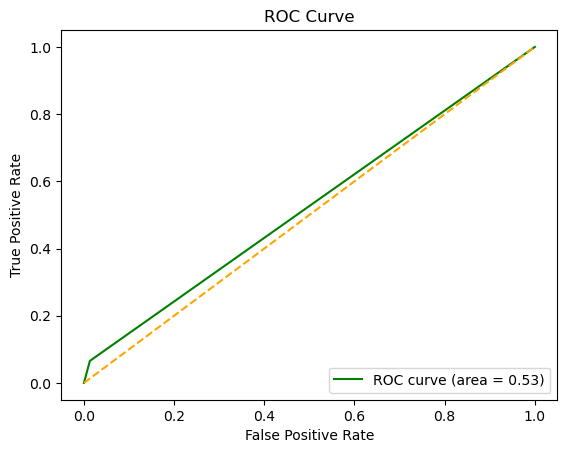

In [48]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score, roc_curve,auc
metrics.append(train_predict_evaluate(MLPClassifier(max_iter=100000,random_state=0),X_train,y_train,X_test))

Accuracy:  0.8775510204081632
Precision:  0.7058823529411765
Recall:  0.19672131147540983
F1 Score:  0.30769230769230765
Confusion Matrix:
 [[375   5]
 [ 49  12]]


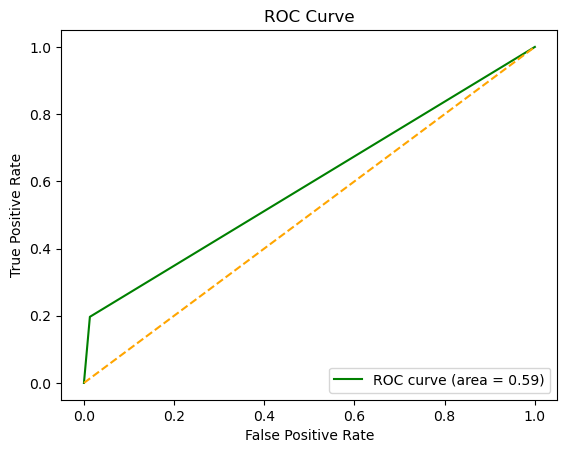

In [49]:
#with standardization
metrics.append(train_predict_evaluate(MLPClassifier(max_iter=100000,random_state=0,**hyp_para_std),X_train_standardized,y_train,X_test_standardized))

Accuracy:  0.8752834467120182
Precision:  0.65
Recall:  0.21311475409836064
F1 Score:  0.32098765432098764
Confusion Matrix:
 [[373   7]
 [ 48  13]]


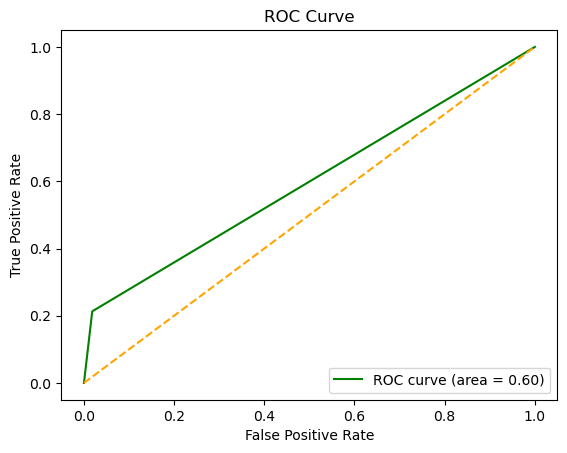

In [50]:
## with normlization
metrics.append(train_predict_evaluate(MLPClassifier(max_iter=100000,random_state=0,**hyp_para_norm),X_train_normalized,y_train,X_test_normalized))

In [51]:
p_df = pd.DataFrame(metrics,columns=["Accuracy","Precision","Recall","F1 Score"],index=["Without Scaling","With Standardization","With Normalization"])
p_df.head()

,Accuracy,Precision,Recall,F1 Score
Without Scaling,0.859410,0.444444,0.065574,0.114286
With Standardization,0.877551,0.705882,0.196721,0.307692
With Normalization,0.875283,0.650000,0.213115,0.320988


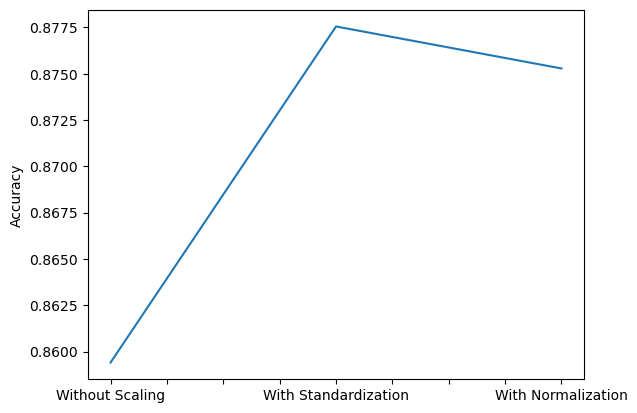

In [52]:
p_df['Accuracy'].plot()
plt.ylabel("Accuracy")
plt.show()

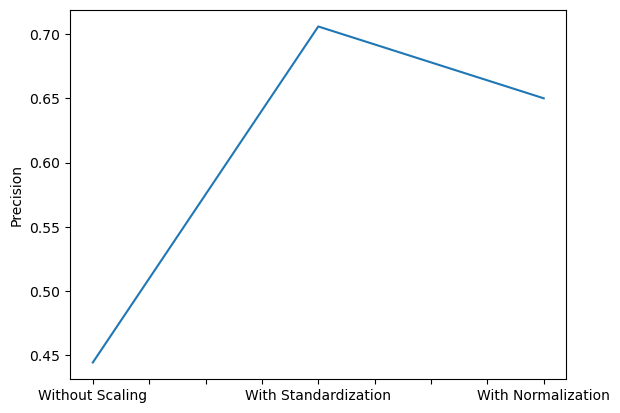

In [53]:
p_df['Precision'].plot()
plt.ylabel("Precision")
plt.show()

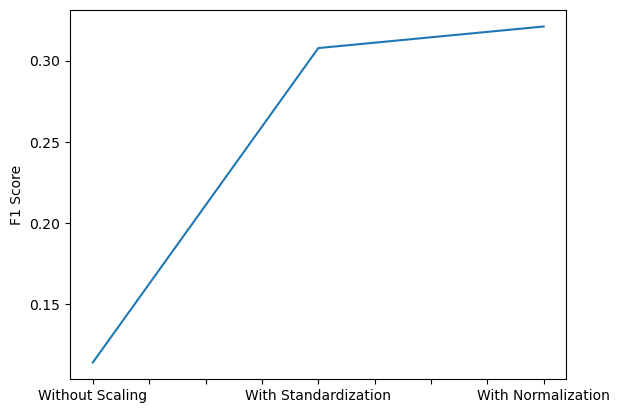

In [54]:
p_df['F1 Score'].plot()
plt.ylabel("F1 Score")
plt.show()

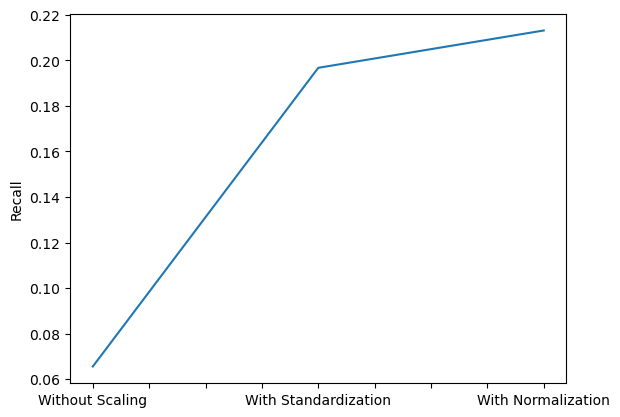

In [55]:
p_df['Recall'].plot()
plt.ylabel("Recall")
plt.show()